In [1]:
import os
import json
import yaml
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
dir = os.path.join("Runs", "SynthethicPeriodicGaussian")
metrics = ["train_loss", "val_loss"]

In [3]:
data = defaultdict(dict)

for model in os.listdir(dir):
    runs = [x for x in os.listdir(os.path.join(dir, model)) if "yaml" not in x]
    
    with open(os.path.join(dir, model, "config.yaml")) as f:
        config = yaml.safe_load(f)
        n = config["training"]["epochs"]
        metrics = config["output"]["metrics"]
        
    for metric in metrics:
        data[model][metric] = np.empty(shape = (len(runs), n))
    
    for (run_id, run) in enumerate(runs):
        with open(os.path.join(dir, model, run, "metrics.json"), 'r') as f:
            run_metrics = json.load(f)
            
        for metric in metrics:
            data[model][metric][run_id, :] = np.array(run_metrics[metric])

In [9]:
def plot_metric(data, metric='train_loss'):
    """
    Plot metric for multiple models, runs, and epochs.
    
    Parameters:
        data (dict): A dictionary where data[model][metric] is an n x m numpy array 
                     (n = number of runs, m = number of epochs).
        metric (str): The metric to plot (e.g., 'training_loss').
    """
    plt.figure(figsize=(12, 8))
    
    for model, metrics in data.items():
        if metric not in metrics:
            print(f"Metric '{metric}' not found for model '{model}'. Skipping...")
            continue
        
        # Extract the metric array (n x m)
        values = metrics[metric]
        mean_values = values.mean(axis=0)  # Mean across runs
        std_values = values.std(axis=0)   # Standard deviation across runs
        epochs = np.arange(1, values.shape[1] + 1)  # Epoch indices

        # Plot mean with shaded region for standard deviation
        plt.plot(epochs, mean_values, label=f"{model} (mean)", linewidth=2)
        plt.fill_between(epochs, mean_values - std_values, mean_values + std_values, 
                         alpha=0.2, label=f"{model} (std dev)")
    
    # Customize plot
    plt.title(f"{metric.replace('_', ' ').capitalize()} Across Models", fontsize=16)
    plt.xlabel("Epoch", fontsize=14)
    plt.xticks(epochs)
    plt.ylabel(metric.replace('_', ' ').capitalize(), fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

[[ 4070.11899414  1417.43188477   903.91210938]
 [ 8165.16152344  6324.05996094  7954.95976562]
 [ 7310.02167969 11922.32382812  4165.71210938]
 [16622.93847656 23756.840625   25960.38515625]
 [ 8779.41533203  6642.17939453  5749.35742188]]
[[11251.23359375  4845.64536133  6808.53261719]
 [ 3966.14150391  6116.21835937  4976.25170898]
 [ 9531.54882812  3911.83066406  8203.77324219]
 [32099.28398438 17817.83164063 17005.30742188]
 [15870.50566406  9759.34931641  2549.52041016]]


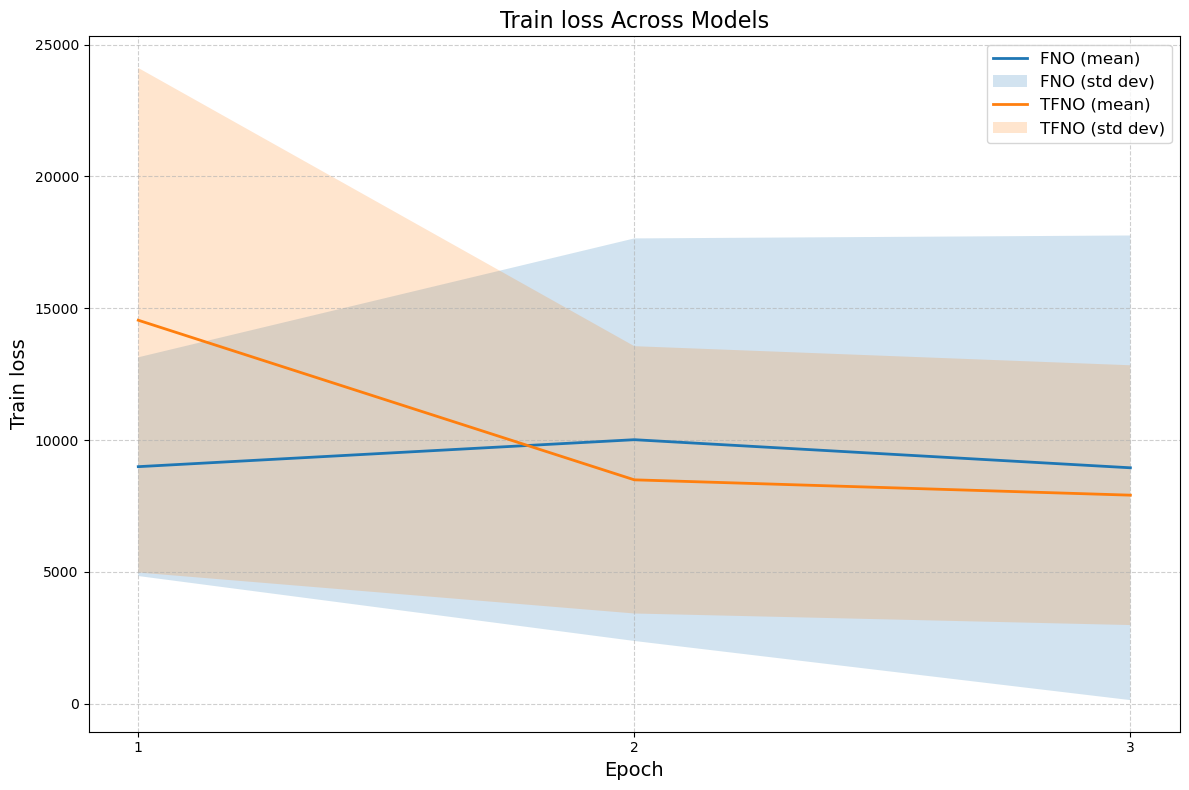

In [10]:
plot_metric(data)

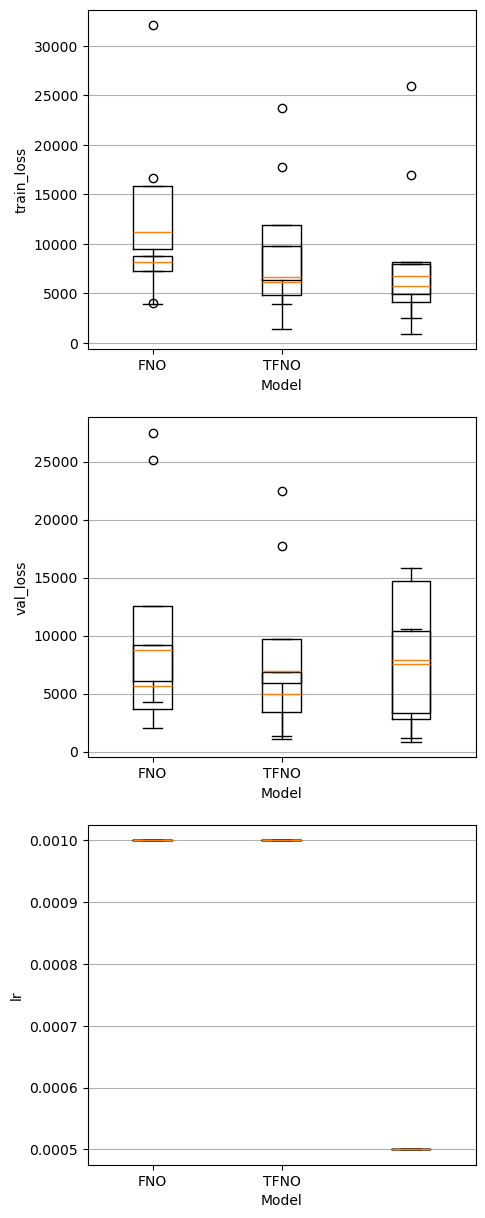

In [7]:
fig, axes = plt.subplots(len(metrics), 1, figsize = (5, len(metrics) * 5))

models = list(data.keys())

for i, ax in enumerate(axes):
    metric = metrics[i]
    
    for model in models:
        ax.boxplot(data[model][metric], label = model)
        
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(models))],
                  labels=models)
    ax.set_xlabel("Model")
    ax.set_ylabel(metric)

In [8]:
plot_data

NameError: name 'plot_data' is not defined